# <b>■ 7장. 파이썬을 이용한 머신러닝</b>
    1. kNN 머신러닝 알고리즘으로 타이타닉 생존자를 예측하는 모델을 생성

## <b>■ 정확도를 바로 출력하는 함수</b>
```python
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat)
accuracy
```

### ※ 문제220. 어제 seaborn의 타이타닉 kNN 모델을 생성하는 코드 맨 아래에 위의 코드를 추가해서 정확도가 나오는지 확인해보시오

In [9]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
n_df = pd.read_csv('train.csv')
df = pd.concat([df,n_df['Name']],axis=1)
appel = df['Name'].str.split(',').str[1].str.split('.')
df['title'] = appel.str.get(0)

age_m = pd.DataFrame(round(df.groupby('title')['age'].mean(),1))
df = pd.merge(df, age_m, on='title',how='left')
df.age_x.fillna(df.age_y, inplace=True)

rdf = df.drop(['embark_town','deck','age_y'],axis=1)
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age_x', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone', 'Name',
       'title'], dtype=object)

In [11]:
ndf = rdf[['survived','pclass','sex','age_x','sibsp','parch','embarked']]
ndf.rename(columns = {'age_x' : 'age'}, inplace = True)

gender = pd.get_dummies(ndf.sex)
ndf = pd.concat([ndf, gender],axis=1)

oh_embarked = pd.get_dummies(ndf.embarked, prefix='town')
ndf = pd.concat([ndf, oh_embarked], axis=1)
ndf = ndf.drop(['embarked','sex'],axis=1,)

X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf.survived

from sklearn import preprocessing as ppc
X = ppc.StandardScaler().fit(X).transform(X)
X

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=4)

from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors=13)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_hat)
print(accuracy)

[[170   8]
 [ 28  62]]
0.8656716417910447


C:\Users\knitwill\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### ※ 문제221. 나이의 결측치를 나이의 최빈값으로 치환하고 학습시켜서 정확도를 확인하시오

In [7]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
n_df = pd.read_csv('train.csv')
df = pd.concat([df,n_df['Name']],axis=1)
appel = df['Name'].str.split(',').str[1].str.split('.')
df['title'] = appel.str.get(0)

# age_m = pd.DataFrame(round(df.groupby('title')['age'].mean(),1))
# df = pd.merge(df, age_m, on='title',how='left')

rdf = df.drop(['embark_town','deck'],axis=1)
rdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,Name,title
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False,"Braund, Mr. Owen Harris",Mr
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True,"Heikkinen, Miss. Laina",Miss
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True,"Allen, Mr. William Henry",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True,"Montvila, Rev. Juozas",Rev
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True,"Graham, Miss. Margaret Edith",Miss
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,no,False,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True,"Behr, Mr. Karl Howell",Mr


In [8]:
rdf['age'].fillna(rdf['age'].value_counts(dropna=True).idxmax(), inplace=True) # 최빈값으로 치환
rdf['embarked'].fillna(rdf['embarked'].value_counts(dropna=True).idxmax() , inplace=True ) 

rdf.columns.values

ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]

gender = pd.get_dummies(ndf.sex)
ndf = pd.concat([ndf, gender],axis=1)

oh_embarked = pd.get_dummies(ndf.embarked, prefix='town')
ndf = pd.concat([ndf, oh_embarked], axis=1)
ndf = ndf.drop(['embarked','sex'],axis=1,)

X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf.survived

from sklearn import preprocessing as ppc
X = ppc.StandardScaler().fit(X).transform(X)
X

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=4)

from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors=13)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_hat)
print(accuracy)

[[166  12]
 [ 29  61]]
0.8470149253731343


### ※ 문제222. 지금 현재 타이타닉 데이터프레임의 결측치가 어느 컬럼에 있는지 확인하시오

In [10]:
ndf.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
female      0
male        0
town_C      0
town_Q      0
town_S      0
dtype: int64

### ※ 문제222. 위의 코드에 데이터만 변경해서 kNN 모델을 생성하시오. 
    R 머신러닝 때 kNN 알고리즘 배울때 사용했던 유방암 데이터로 모델을 생성하시오
    wisc_bc_data.csv
    Wisconsin Hospital 데이터
    유방암 종양의 크기와 지름, 거칠기 등에 대한 수치 데이터이며 라벨 컬럼은 diagnosis이고 B가 양성, M이 악성

In [13]:
import pandas as pd
df = pd.read_csv('wisc_bc_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

### <b>■ 머신러닝 모델 훈련 및 예측 순서</b>
    1. 데이터프레임 생성
    2. 결측치 확인 및 처리
    3. 범주형 데이터를 수치형 데이터로 변경
    4. 정규화 또는 표준화
    5. 훈련 데이터와 테스트 분리
    6. 모델 훈련
    7. 예측
    8. 모델 평가

In [41]:
# 1. 데이터프레임 생성
import pandas as pd
df = pd.read_csv('wisc_bc_data.csv')

# 2. 결측치 확인 및 처리
df.isnull().sum()

# 3. 범주형 데이터를 수치형 데이터로 변경
diag = pd.get_dummies(df.diagnosis, prefix='diag')
df = pd.concat([df, diag],axis=1)

rdf = df.drop(['diagnosis','diag_B'],axis=1)

# 4. 정규화 또는 표준화
y = df.diag_M
X = rdf.drop('diag_M',axis=1)

from sklearn import preprocessing as ppc
X = ppc.StandardScaler().fit(X).transform(X)

# 5. 훈련 데이터와 테스트 분리
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.3,random_state=5)
X_train.shape, X_test.shape

# 6. 모델 훈련
from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors = 7)
knn.fit(X_train, y_train)

# 7. 예측
y_hat = knn.predict(X_test)

# 8. 모델 평가
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_hat)
print(accuracy)

[[108   2]
 [  0  61]]
0.9883040935672515


    위의 FN(False Negative)를 0으로 만들어 줄 수 있는 k값을 찾는게 목표
    
    FN : 기계는 병이 없다고 예측했는데 틀린경우
    TN : 기계는 병이 없다고 예측했는데 맞힌경우
    FP : 기계가 병이 있다고 예측했는데 틀린경우
    TP : 기계가 병이 있다고 예측했는데 맞힌경우

In [42]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()
print(tn, fp, fn, tp)

108 2 0 61


### ※ 문제223. 유방암 데이터의 FN을 0으로 하면서 정확도가 높은 k값이 몇인지 loop문으로 알아내시오

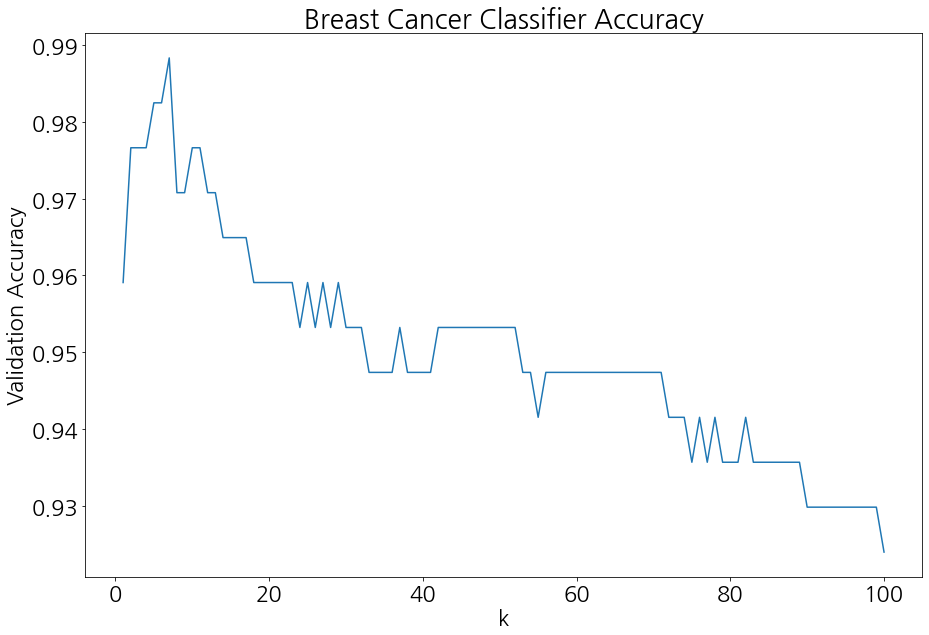

In [48]:
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})


k_list = range(1,101)
accuracies = []
for k in k_list:
    classifier = knc(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()